## Personal Loan Campaign

## Context 
AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.

### Dataset

The data contains characteristics of the people

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank? 
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### Loading Libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data

from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

<IPython.core.display.Javascript object>

### Load data

In [2]:
data = pd.read_csv("Loan_Modelling.csv")

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset.

In [3]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [4]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


<IPython.core.display.Javascript object>

### View random sample of data

In [5]:
np.random.seed(1)  # to get the same random results every time
data.sample(n=10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.8,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.0,3,0,0,0,0,0,1


<IPython.core.display.Javascript object>

* ID to Mortgage are numerical values, while Personal_Loan to CreditCard are categories of zeros and ones.
* We have undergrads up to 49 years of age. We can assume that this accounts for customers who did not pursue a college degree and not just college students.

### Understand the shape of the dataset.

In [6]:
data.shape

(5000, 14)

<IPython.core.display.Javascript object>

* The dataset has 5000 rows and 14 columns 

### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

* Almost all the variables in this dataset are integer data type. We will be converting some of these to categorical data type. 
* Dependent variable is the Personal_Loan variable.
* There are no missing values in the dataset.

In [8]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

* No duplicate rows in dataset

### Summary of the dataset.

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<IPython.core.display.Javascript object>

* `Age`: Average age of people in the dataset is 45 years, age ranges from 23 to 67 years.
* `Income`: The average income in dollars is 73000. There's a large difference between the maximum value and 75th percentile which indicates that there might be outliers present in this variable.
* `CC_Avg`: There's a huge difference in the 75th percentile and maximum value of CC_Avg indicating the presence of outliers. Also, the minimum observations are 0.
* `Experience`: The minimum value is -3 years. Years of experience should not be in negative values.
* "ZIPCode","Family","Education","Personal_Loan","Securities_Account","CD_Account","Online"and "CreditCard" would serve our analysis better as categorical variables

## Data Pre-processing

**Explore Experience column further**

In [10]:
data.sort_values(by=["Experience"], ascending=True).head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4514,4515,24,-3,41,91768,4,1.0,3,0,0,0,0,1,0
2618,2619,23,-3,55,92704,3,2.4,2,145,0,0,0,1,0
4285,4286,23,-3,149,93555,2,7.2,1,0,0,0,0,1,0
3626,3627,24,-3,28,90089,4,1.0,3,0,0,0,0,0,0
3796,3797,24,-2,50,94920,3,2.4,2,0,0,1,0,0,0


<IPython.core.display.Javascript object>

**We will attempt to fix the negative values in the *Experience* column**

In [11]:
# function to return the absolute values for all values in *Experience* column
data["Experience"] = data["Experience"].apply(lambda x: abs(x))

<IPython.core.display.Javascript object>

## Feature Engineering

#### Mapping ZIPCode to County to reduce the number of unique values.

In [12]:
# import python package to map zipcodes to different locations
from uszipcode import SearchEngine

search = SearchEngine(simple_zipcode=True)

<IPython.core.display.Javascript object>

In [13]:
# get zipcode county locations
zip_list = data.ZIPCode.tolist()
zip_data = dict()
for z in zip_list:
    zipcode = search.by_zipcode(z)
    zip_dic = zipcode.to_dict()
    zip_city = zip_dic["county"]
    zip_data[z] = zip_city

<IPython.core.display.Javascript object>

In [14]:
# Map to Zipcode column
data["County"] = data["ZIPCode"].map(zip_data)

<IPython.core.display.Javascript object>

In [15]:
data["County"].value_counts(dropna=False)

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Kern County                 54
Marin County                54
NaN                         34
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Tuolumne

<IPython.core.display.Javascript object>

**There are still some values that do not belong to a California county. Let's replace nan values with the string unknown**

In [16]:
data["County"].fillna("Unknown", inplace=True)

<IPython.core.display.Javascript object>

### Fixing Datatypes

#### Lets convert "County","Family","Education","Personal_Loan","Securities_Account","CD_Account","Online" and "CreditCard" to category.

In [17]:
cat_group = [
    "County",
    "Family",
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
]

<IPython.core.display.Javascript object>

In [18]:
# convert to category
for cat in cat_group:
    data[cat] = data[cat].astype("category")

<IPython.core.display.Javascript object>

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   int64   
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
 14  County              5000 non-null   category
dtypes: category(8), float64(1), int64(6)
m

<IPython.core.display.Javascript object>

* Appropriate datatypes have been assigned.

#### At this point, we'll create two dataframes, one for each model.

In [20]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

**Lets us look at different levels in categorical variables**

In [21]:
# filtering object type columns
cat_col = data.describe(include=["category"]).columns
cat_col

Index(['Family', 'Education', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'County'],
      dtype='object')

<IPython.core.display.Javascript object>

In [22]:
for i in cat_col:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Family are :
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
**************************************************
Unique values in Education are :
1    2096
3    1501
2    1403
Name: Education, dtype: int64
**************************************************
Unique values in Personal_Loan are :
0    4520
1     480
Name: Personal_Loan, dtype: int64
**************************************************
Unique values in Securities_Account are :
0    4478
1     522
Name: Securities_Account, dtype: int64
**************************************************
Unique values in CD_Account are :
0    4698
1     302
Name: CD_Account, dtype: int64
**************************************************
Unique values in Online are :
1    2984
0    2016
Name: Online, dtype: int64
**************************************************
Unique values in CreditCard are :
0    3530
1    1470
Name: CreditCard, dtype: int64
**************************************************
Unique values 

<IPython.core.display.Javascript object>

## Univariate Analysis

## Numerical Variables

In [23]:
def histogram_boxplot(data, feature, figsize=(12, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Observations on Age

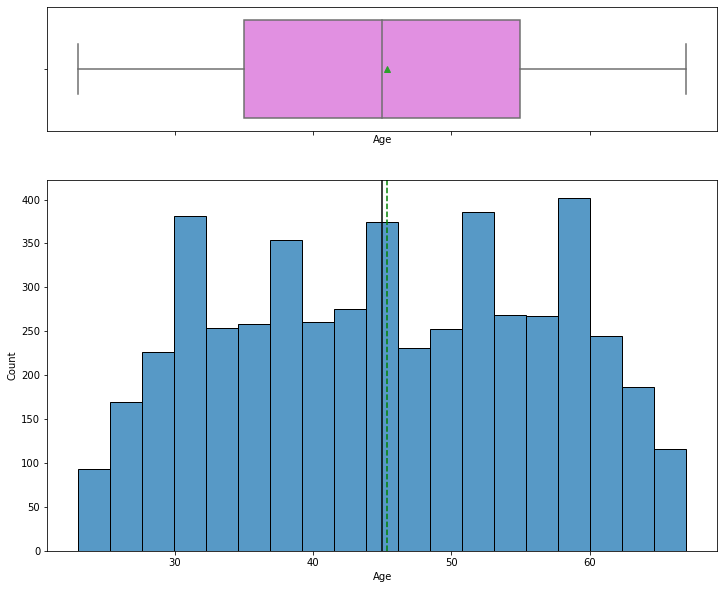

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(data, "Age")

* Doesn't seem to be skewed to either side and no outliers present
* Mean and median values are close at 45.3 and 45 years respectively

### Observations on Experience

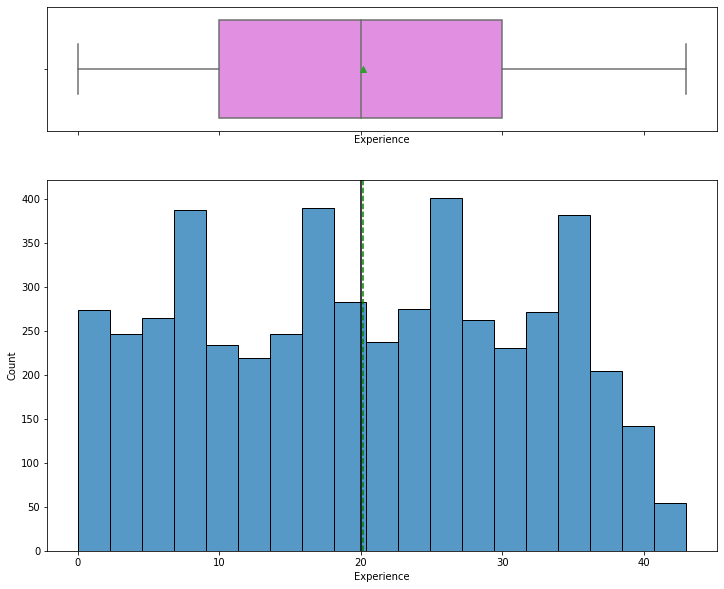

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(data, "Experience")

* Doesn't seem to be skewed to either side and no outliers present
* Mean and median values are close at 20.1 and 20 years respectively

### Observations on Income

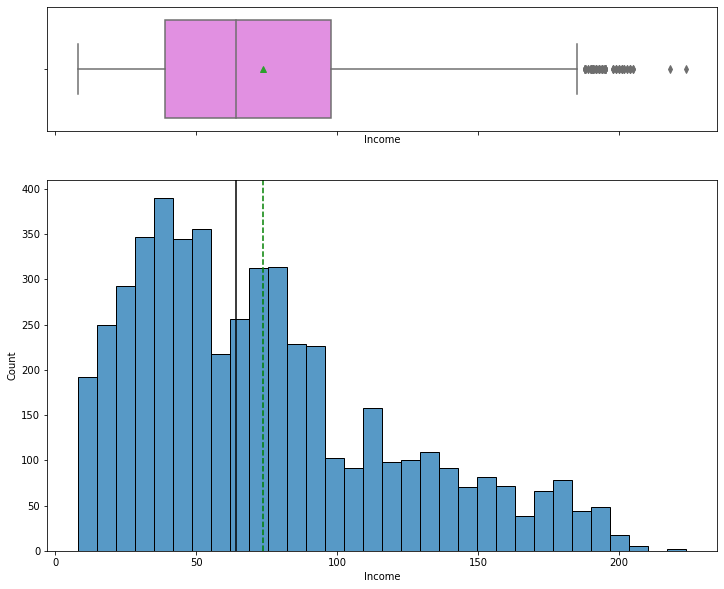

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(data, "Income")

* There are outliers present
* Income is skewed to the right
* We will not be treating these outliers as they reflect the actual trend

### Observations on CCAvg

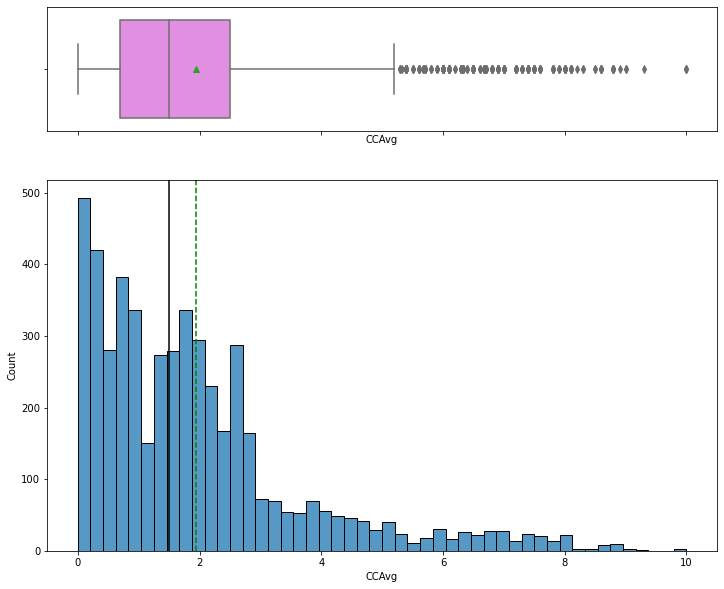

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(data, "CCAvg")

* There are outliers present
* CCAvg is skewed to the right
* We will not be treating these outliers as they reflect the actual trend

### Observations on Mortgage

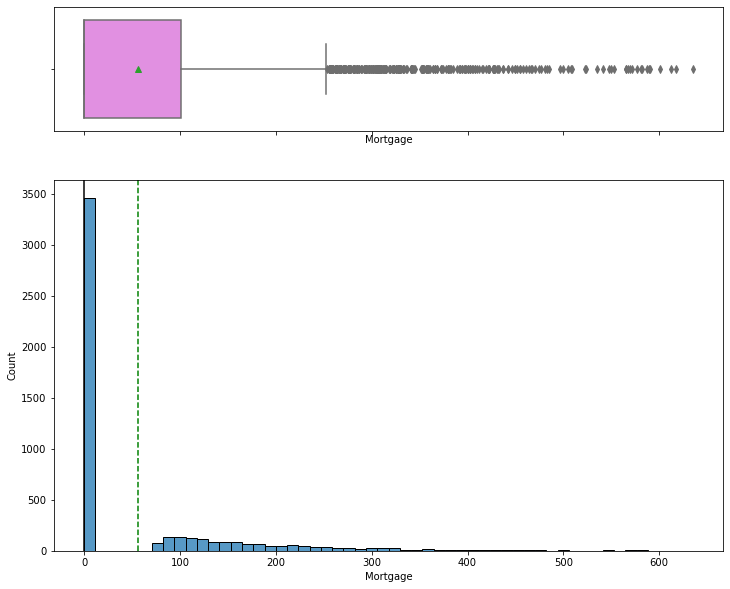

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(data, "Mortgage")

* Most of the bank customers do not have houses with mortgage value
* This translates to a lot of outliers in the data for those with high value mortgage houses

## Categorical Variables

In [29]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Observations on Family

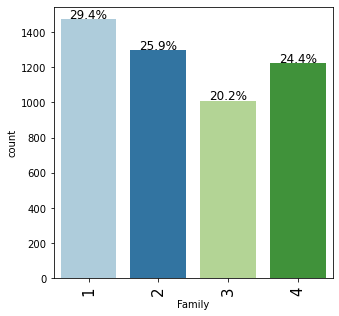

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(data, "Family", perc=True)

* 29.4% and 25.9% have a family size of one and two respectively.
* 20.2% and 24.4% have a family size of three and four respectively.

### Observations on Education

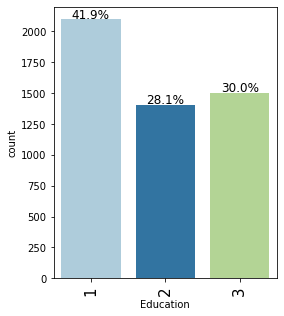

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(data, "Education", perc=True)

* 41.9% are Undergrads
* 28.1% are Graduates
* 30% are Advanced/Professionals

### Observations on Securities_Account

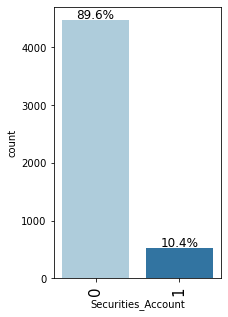

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(data, "Securities_Account", perc=True)

* Only 10.4% of observed customers have a securities account.

### Observations on CD_Account

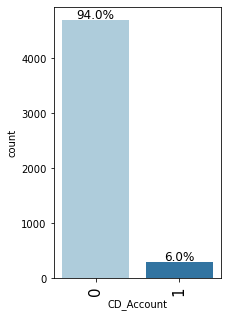

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(data, "CD_Account", perc=True)

* Only 6% of the observed have a certificate of deposit (CD) account

### Observations on Online

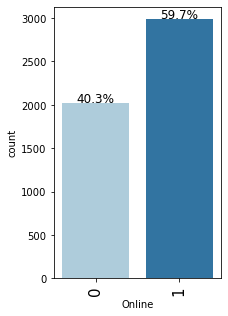

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(data, "Online", perc=True)

* More observed customers use the internet banking facilities

### Observations on CreditCard

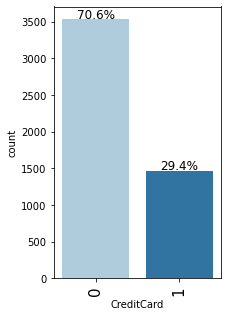

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(data, "CreditCard", perc=True)

* 70.6% of observed customers use credit cards.

### Observations on ZIPCode

<AxesSubplot:xlabel='count', ylabel='County'>

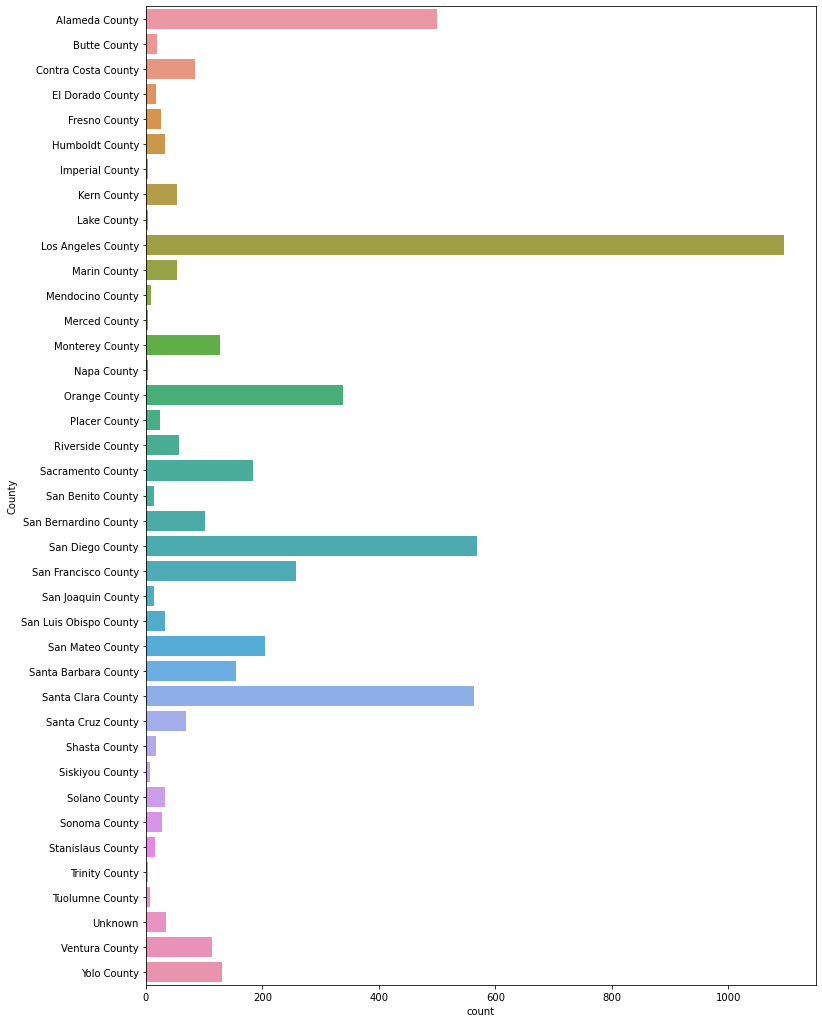

<IPython.core.display.Javascript object>

In [36]:
plt.figure(figsize=(12, 18))
sns.countplot(y="County", data=data)

* Los Angeles county has the majority of customers by a considerable distance.

### Observations on salary

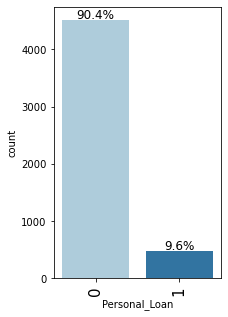

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(data, "Personal_Loan", perc=True)

* 90.4% of the observations have not accepted a loan in the previous campaign compared to the 9.6% that did.

## Bivariate analysis

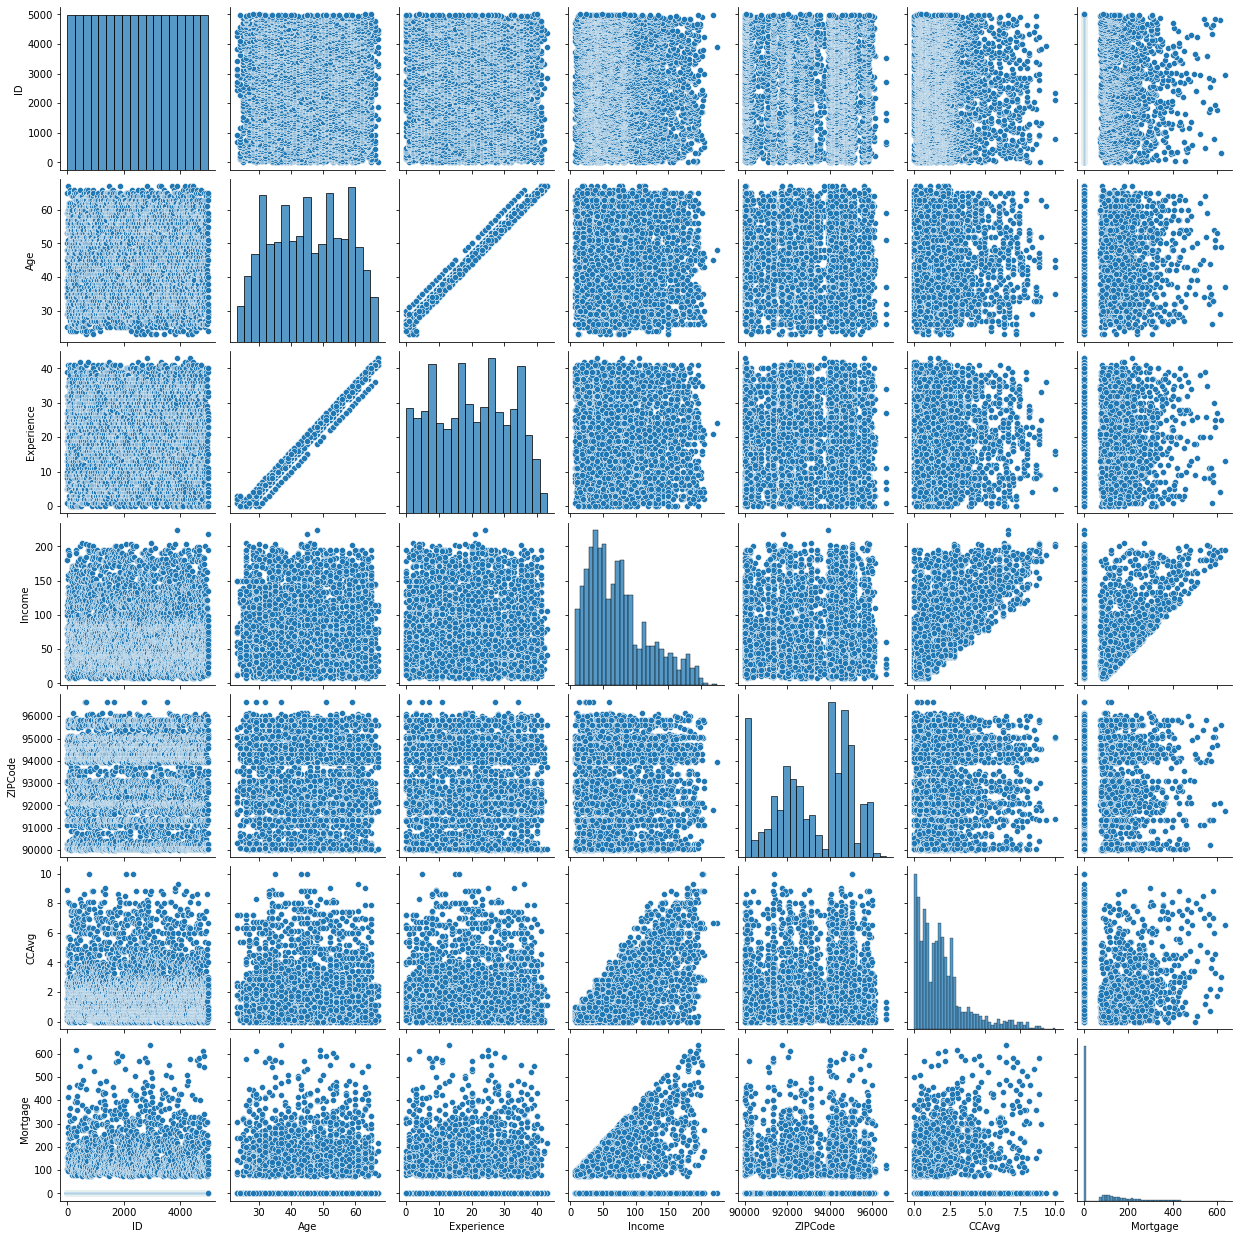

<IPython.core.display.Javascript object>

In [38]:
sns.pairplot(data=data.select_dtypes(include=np.number))

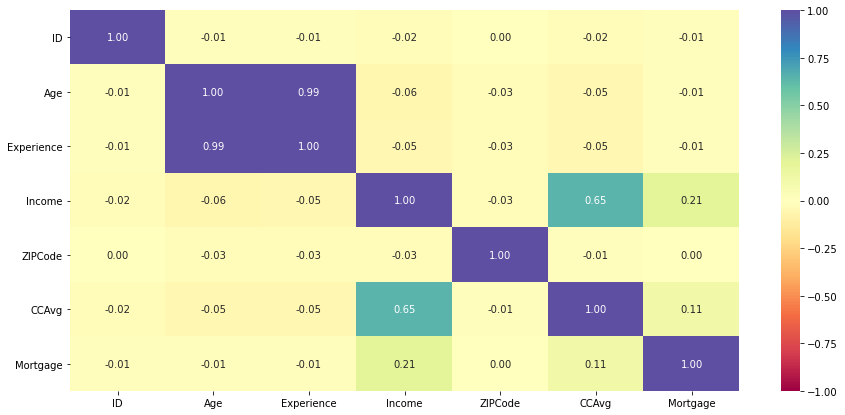

<IPython.core.display.Javascript object>

In [39]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is a very strong positive correlation between Age and Experience, which makes sense because older members of the workforce are very much likely to have more working experience than their younger counterparts.
* There is some positive correlation between Income and CCAvg. Customers who make more money would tend to spend slightly more on their credit cards.
* An interesting observation is Income and CCAvg having a negative correlation with Age and Experience.

## Categorical Analysis

In [40]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab
    tab1 = pd.crosstab(x, data["Personal_Loan"], margins=True).sort_values(
        by=1, ascending=False
    )
    print(tab1)
    print("-" * 120)
    ## visualising the cross tab
    tab = pd.crosstab(x, data["Personal_Loan"], normalize="index").sort_values(
        by=1, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(17, 7))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [41]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

### Family vs Personal_Loan

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


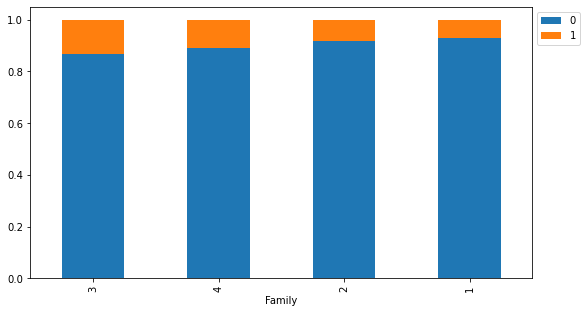

<IPython.core.display.Javascript object>

In [42]:
stacked_barplot(data, "Family", "Personal_Loan")

* There is some indication that customers with larger families are more likely to purchase a loan

### Personal_Loan vs Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


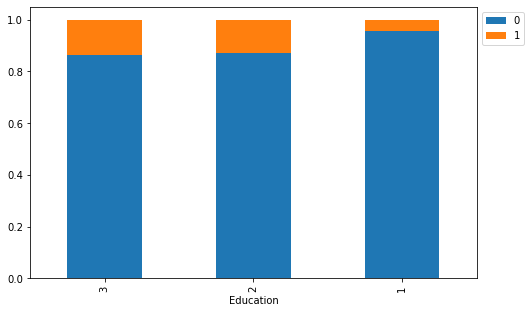

<IPython.core.display.Javascript object>

In [43]:
stacked_barplot(data, "Education", "Personal_Loan")

* It is not common for an undergrad to purchase a loan but acceptance rate is much higher in advanced/professionals

### Personal_Loan vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


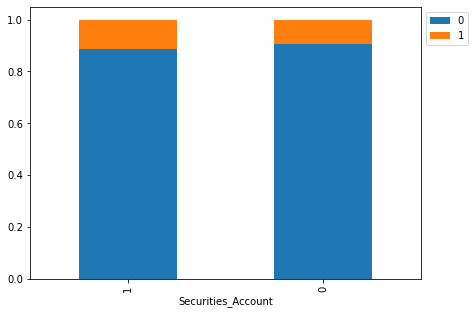

<IPython.core.display.Javascript object>

In [44]:
stacked_barplot(data, "Securities_Account", "Personal_Loan")

* There seems to be little or no difference in the success rates of security and non-security account holders.

### Personal_Loan vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


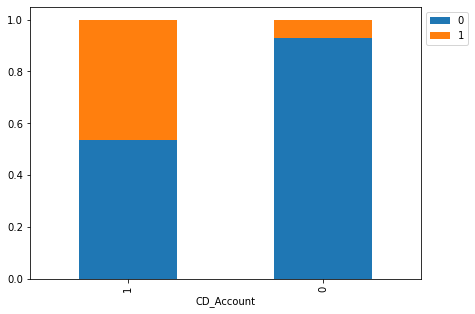

<IPython.core.display.Javascript object>

In [45]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

* Almost half the customers with a CD account purchased a loan in contrast to the very little success rate in those without a CD account.

### Personal_Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


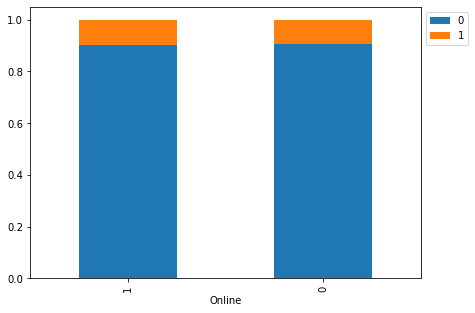

<IPython.core.display.Javascript object>

In [46]:
stacked_barplot(data, "Online", "Personal_Loan")

* The utilization of internet banking facilties seems to have no effect on the loan acceptance rate.

### Personal_Loan vs CreditCard

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


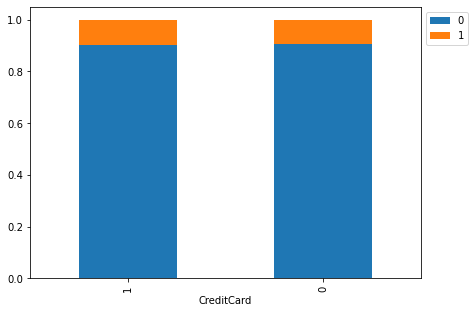

<IPython.core.display.Javascript object>

In [47]:
stacked_barplot(data, "CreditCard", "Personal_Loan")

* Possession of credit card does relatively little in determining a customer accepting a loan.

## Numerical Analysis

In [48]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 0],
        palette="gist_rainbow",
        showmeans=True,
    )

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
        showmeans=True,
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

### Personal_Loan vs Age

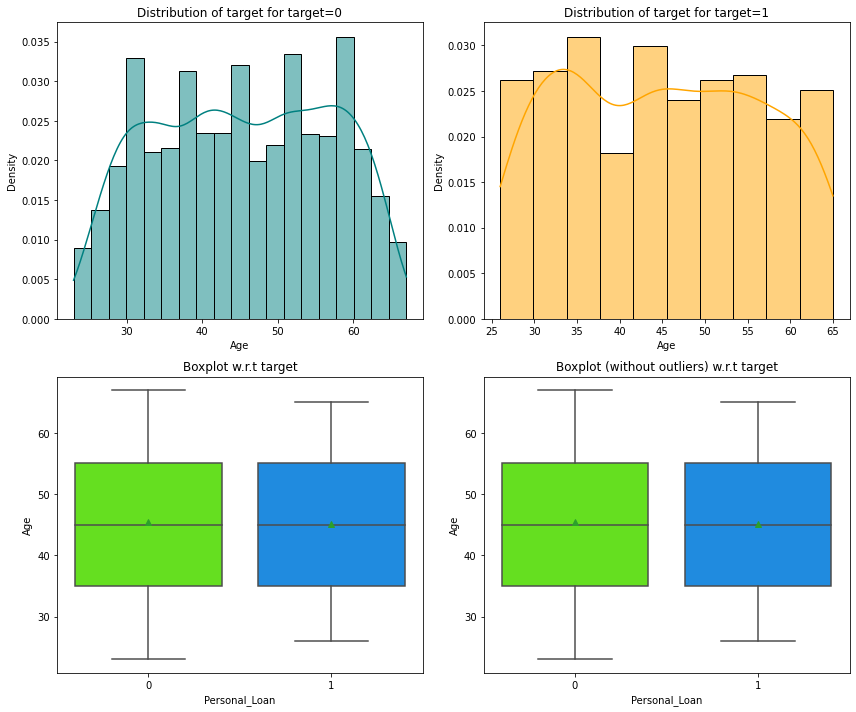

<IPython.core.display.Javascript object>

In [49]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

* Observations on customers who purchased loans in the last campaign has a smaller age range, but average age is almost the same for liability and asset customers

### Personal_Loan vs Experience

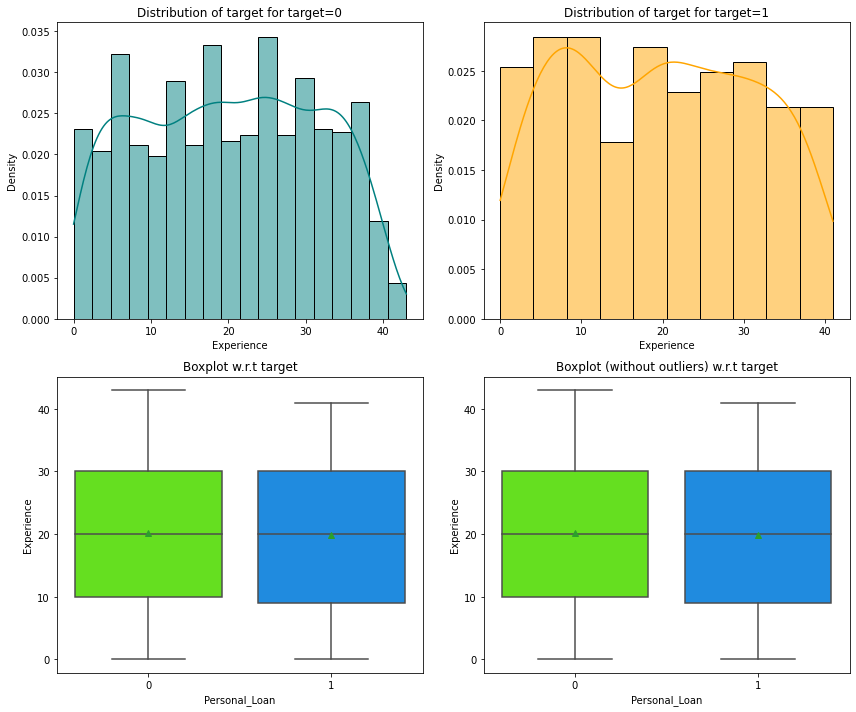

<IPython.core.display.Javascript object>

In [50]:
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

* As expected we have similar results to Age in Experience

### Personal_Loan vs Income

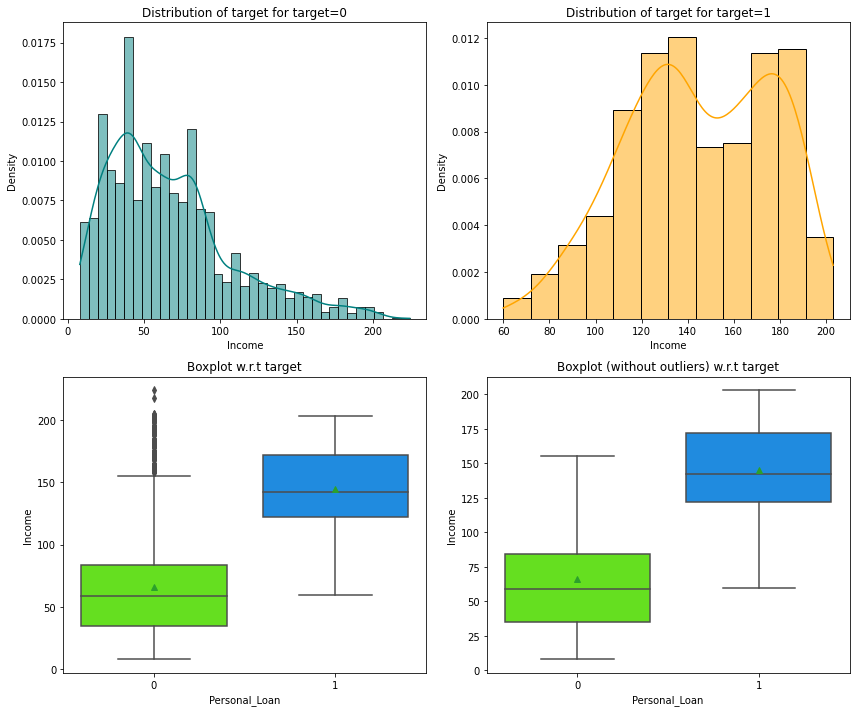

<IPython.core.display.Javascript object>

In [51]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

* There is huge disparity in income figures with customers likely to purchase a loan having a much higher average

### Personal_Loan vs CCAvg

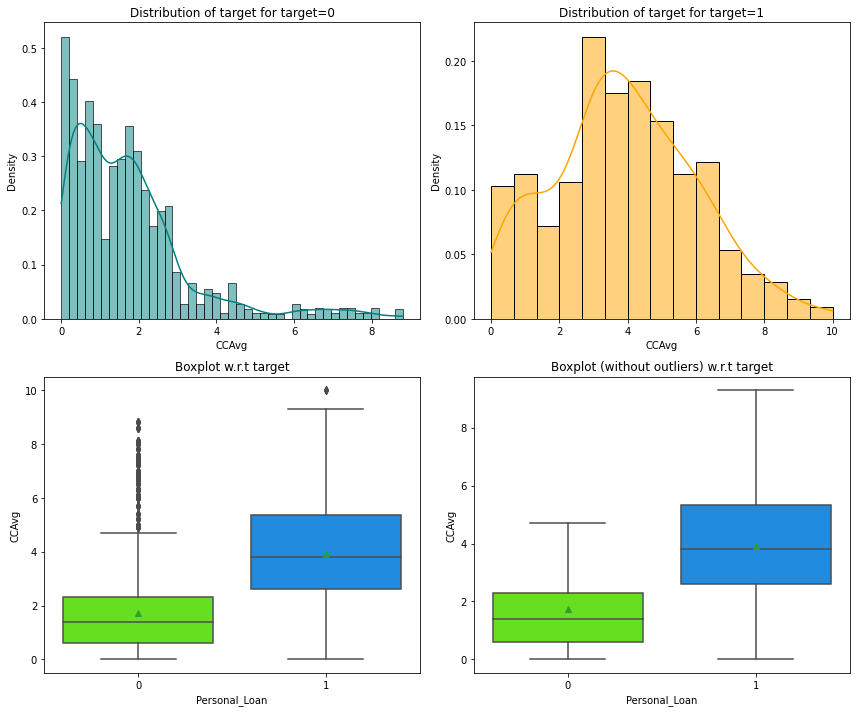

<IPython.core.display.Javascript object>

In [52]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

* Much like income, credit card spending is much higher on average in asset customers.

### Personal_Loan vs Income vs Education

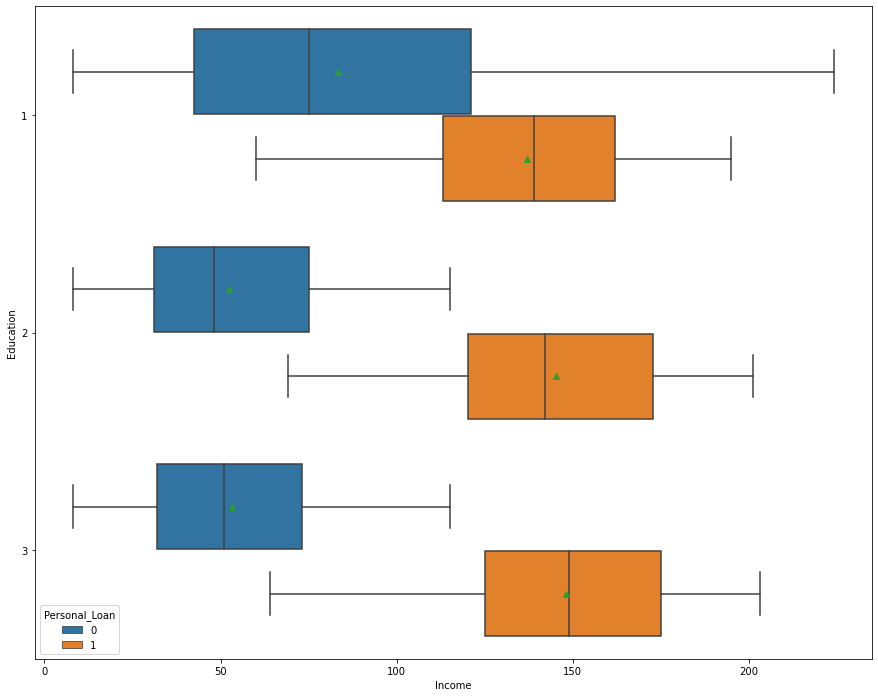

<IPython.core.display.Javascript object>

In [53]:
plt.figure(figsize=(15, 12))
sns.boxplot(
    y="Education",
    x="Income",
    data=data,
    hue="Personal_Loan",
    showfliers=False,
    showmeans=True,
)
plt.show()

* Undergrad depositors have the highest income on average but traditionally could be less likely to purchase loans compared to their more educated colleagues.

# Logistic Regression Model

### Data Preparation

**Creating training and test sets.**

In [54]:
# drop ID and ZIPCode column from model
X = data.drop(["Personal_Loan", "ID", "ZIPCode"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [55]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 52)
Shape of test set :  (1500, 52)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

### Building the model

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a customer is likely to purchase a loan but in reality the customer did not.
2. Predicting a person isn't likely to purchase a loan but in reality the customer did.

### Which case is more important? 
* Both the cases are important as:

* If we predict a customer is likely to purchase a loan but in reality the customer did not, marketing campaigns and resources will be wasted.

* If we predict a person isn't likely to purchase a loan but in reality the customer did, we would lose a potential customer and this would negatively affect our success ratio.


### How to reduce this loss i.e need to reduce False Negatives?
*  `Recall` should be maximized, the greater the recall the higher the chances of increasing the success ratio.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [56]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [57]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Logistic Regression (with Sklearn library)

In [58]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [59]:
# predicting on training set
y_pred_train = lg.predict(X_train)

<IPython.core.display.Javascript object>

In [60]:
print("Training set performance:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1:", f1_score(y_train, y_pred_train))

Training set performance:
Accuracy: 0.9625714285714285
Precision: 0.890625
Recall: 0.6888217522658611
F1: 0.776831345826235


<IPython.core.display.Javascript object>

#### Checking performance on test set

In [61]:
# predicting on the test set
y_pred_test = lg.predict(X_test)

<IPython.core.display.Javascript object>

In [62]:
print("Test set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1:", f1_score(y_test, y_pred_test))

Test set performance:
Accuracy: 0.954
Precision: 0.9081632653061225
Recall: 0.5973154362416108
F1: 0.7206477732793521


<IPython.core.display.Javascript object>

**Observations**

- The training and testing recall scores are 0.69 and 0.60 respectively.

- We will look to improve our model and optimize for recall.


- To identify significant variables we will have to build a logistic regression model using the statsmodels library.

- We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

### Logistic Regression (with statsmodels library)

In [63]:
X = data.drop(["Personal_Loan", "ID", "ZIPCode"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [64]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3447
Method:                           MLE   Df Model:                           52
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6694
Time:                        23:14:30   Log-Likelihood:                -362.13
converged:                      False   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                9.412e-273
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -13.8482      2.302     -6.015      0.000     -18.361      -9.336
Age                               0.0009      0.084      0.010      0.992 

<IPython.core.display.Javascript object>

In [65]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.964571,0.712991,0.890566,0.791946


<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient shows that probability of customer purchasing a loan decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that that probability of customer purchasing a loan increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

### Additional Information on VIF

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use. 

### Multicollinearity

In [66]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                            461.006340
Age                               92.482526
Experience                        92.377065
Income                             1.917875
CCAvg                              1.760991
Mortgage                           1.061009
Family_2                           1.420952
Family_3                           1.399521
Family_4                           1.442466
Education_2                        1.316474
Education_3                        1.341745
Securities_Account_1               1.160051
CD_Account_1                       1.376503
Online_1                           1.056084
CreditCard_1                       1.126089
County_Butte County                1.036412
County_Contra Costa County         1.142204
County_El Dorado County            1.030292
County_Fresno County               1.034880
County_Humboldt County             1.064271
County_Imperial County             1.007742
County_Kern County                 1.0948

<IPython.core.display.Javascript object>

* High correlation between Age and Experience has been highlighted in the VIF values as we very much expected from our prior analysis.
* We will drop Age since we get similar information from Experience.

#### Removing Age

In [67]:
X_train1 = X_train.drop(["Age"], axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                            23.652949
Experience                        1.025191
Income                            1.913432
CCAvg                             1.756393
Mortgage                          1.060982
Family_2                          1.420399
Family_3                          1.396525
Family_4                          1.442466
Education_2                       1.304204
Education_3                       1.264376
Securities_Account_1              1.159693
CD_Account_1                      1.375711
Online_1                          1.056000
CreditCard_1                      1.126081
County_Butte County               1.036132
County_Contra Costa County        1.142111
County_El Dorado County           1.030186
County_Fresno County              1.034880
County_Humboldt County            1.063616
County_Imperial County            1.007093
County_Kern County                1.094804
County_Lake County                1.013812
County_Los Angeles 

<IPython.core.display.Javascript object>

* Removal of Age seems to have fixed multicollinearity.

In [68]:
logit2 = sm.Logit(y_train, X_train1.astype(float))
lg2 = logit2.fit()

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train1, y_train)

         Current function value: 0.103465
         Iterations: 35
Training performance:


,Accuracy,Recall,Precision,F1
0,0.964571,0.712991,0.890566,0.791946


<IPython.core.display.Javascript object>

* No significant change in the model performance.
* This could be explained with the p-value of Age and Experience being less than 0.05 and therefore insignificant to this model.
* We will be dropping both variables.

#### Dropping Age and Experience

In [69]:
X_train2 = X_train.drop(["Experience", "Age"], axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

const                            19.950403
Income                            1.911379
CCAvg                             1.753764
Mortgage                          1.060903
Family_2                          1.420357
Family_3                          1.396496
Family_4                          1.436959
Education_2                       1.302822
Education_3                       1.264357
Securities_Account_1              1.159522
CD_Account_1                      1.374398
Online_1                          1.055975
CreditCard_1                      1.125960
County_Butte County               1.035459
County_Contra Costa County        1.141893
County_El Dorado County           1.030177
County_Fresno County              1.034869
County_Humboldt County            1.063608
County_Imperial County            1.006988
County_Kern County                1.094804
County_Lake County                1.013733
County_Los Angeles County         2.428366
County_Marin County

<IPython.core.display.Javascript object>

* There is no multicollinearity in our features.

In [70]:
logit3 = sm.Logit(y_train, X_train2.astype(float))
lg3 = logit3.fit()

print("Training performance:")
model_performance_classification_statsmodels(lg3, X_train2, y_train)

         Current function value: 0.103505
         Iterations: 35
Training performance:


,Accuracy,Recall,Precision,F1
0,0.964571,0.712991,0.890566,0.791946


<IPython.core.display.Javascript object>

* As expected, still no significant change in the model performance.

#### Summary of the model without Age and Experience

In [71]:
print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3449
Method:                           MLE   Df Model:                           50
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6693
Time:                        23:15:01   Log-Likelihood:                -362.27
converged:                      False   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                3.673e-274
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -13.7214      0.824    -16.655      0.000     -15.336     -12.107
Income                            0.0647      0.004     16.096      0.000 

<IPython.core.display.Javascript object>

* In the case of 'Mortgage' all the attributes have a high p-value which means it is not significant therefore we can drop the complete variable.
* For other attributes present in the data, the p-values are high only for few dummy variables and since only one (or some) of the categorical levels have a high p-value we will drop them iteratively as sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

* Instead, we will do the following repeatedly using a loop:
  - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  - Repeat the above two steps till there are no columns with p-value > 0.05.


Note: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [72]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = X_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train2[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'Income', 'CCAvg', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1', 'County_Kern County', 'County_Riverside County', 'County_San Mateo County']


<IPython.core.display.Javascript object>

In [73]:
X_train3 = X_train2[selected_features]

<IPython.core.display.Javascript object>

In [74]:
logit4 = sm.Logit(y_train, X_train3.astype(float))
lg4 = logit4.fit(disp=False)

print(lg4.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3486
Method:                           MLE   Df Model:                           13
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6628
Time:                        23:15:10   Log-Likelihood:                -369.38
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                8.803e-303
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -13.4751      0.719    -18.749      0.000     -14.884     -12.067
Income                      0.0650      0.004     16.509      0.000       0.057       0.073


<IPython.core.display.Javascript object>

**Now no feature has p-value greater than 0.05, so we'll consider the features in *X_train3* as the final ones and *lg4* as final model.**

### Coefficient interpretations

* Coefficient of some levels of Education, Family, Income, CCAvg and CD_Account are positive. An increase in these will lead to increase in chances of a person purchasing a loan. 

* Coefficient of some levels of Securities_Account, Online and CreditCard are negative. An increase in these will lead to decrease in chances of a person purchasing a loan.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [75]:
# converting coefficients to odds
odds = np.exp(lg4.params)

# finding the percentage change
perc_change_odds = (np.exp(lg4.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train3.columns).T

,const,Income,CCAvg,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,County_Kern County,County_Riverside County,County_San Mateo County
Odds,0.000001,1.067190,1.264466,13.071537,5.405919,56.964651,72.081422,0.345344,45.143460,0.526902,0.343009,4.349088,7.625083,0.248675
Change_odd%,-99.999859,6.718953,26.446633,1207.153662,440.591889,5596.465145,7108.142195,-65.465638,4414.346049,-47.309796,-65.699129,334.908753,662.508317,-75.132521


<IPython.core.display.Javascript object>

### Coefficient interpretations

* `Income`: Holding all other features constant a 1 unit change in Income will increase the odds of a customer purchasing a loan by 1.07 times or a 6.72% increase in odds of purchasing a loan.
* `CCAvg`: Holding all other features constant a 1 unit change in CCAvg will increase the odds of a customer purchasing a loan by 1.26 times or a 26.4% increase in odds of purchasing a loan.
* The odds of a customer with a family size of three purchasing a loan is 13.07 times more than the customer with a family size of two or one, or 1207.1% more odds of purchasing a loan. Similarly, the odds of a customer with a family size of four purchasing a loan is 5.40 times more than the customer with a family size of two or one, or 440.6% more odds of purchasing a loan. [keeping Family_1 and Family_2 category as a reference].
* The odds of a graduate customer purchasing a loan is 56.96 times more than an undergrad customer, or 5596.4% more odds of purchasing a loan. Similarly, the odds of an Advanced/Professional customer purchasing a loan is 72.08 times more than the undergrad customer, or 7108.1% more odds of purchasing a loan. [keeping Education_1 as a reference].
* The odds of a Riverside county customer purchasing a loan is 7.62 times more than other California counties, or 662.5% more odds of purchasing a loan. Similarly, the odds of a San Mateo county customer purchasing a loan is 0.25 times less than other California counties, or 75.1% fewer odds of purchasing a loan.
* The odds of a customer with a securities account  purchasing a loan is 0.34 times less than a customer without a securities account, or 65.4% fewer odds of purchasing a loan.
* The odds of a customer with a credit card purchasing a loan is 0.34 times less than a customer without a credit card, or 65.7% fewer odds of purchasing a loan.

`Interpretation for other attributes can be done similarly.`

#### Checking model performance on the training set

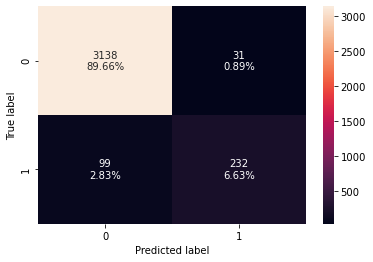

<IPython.core.display.Javascript object>

In [76]:
# creating confusion matrix
confusion_matrix_statsmodels(lg4, X_train3, y_train)

In [77]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg4, X_train3, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.962857,0.700906,0.882129,0.781145


<IPython.core.display.Javascript object>

#### ROC-AUC

* ROC-AUC on training set

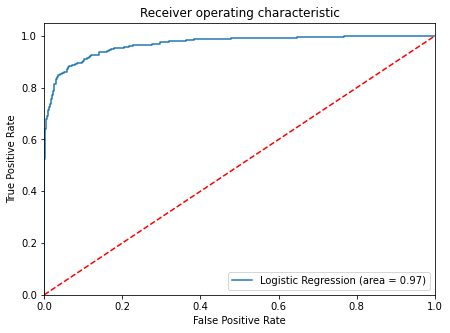

<IPython.core.display.Javascript object>

In [78]:
logit_roc_auc_train = roc_auc_score(y_train, lg4.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg4.predict(X_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving decent performance on training set.

### Model Performance Improvement

* Let's see if the recall can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [79]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg4.predict(X_train3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.13451091873608728


<IPython.core.display.Javascript object>

#### Checking model performance on training set

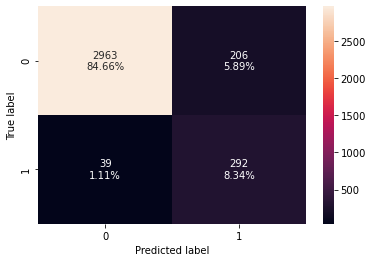

<IPython.core.display.Javascript object>

In [80]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg4, X_train3, y_train, threshold=optimal_threshold_auc_roc
)

In [81]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = (
    model_performance_classification_statsmodels(
        lg4, X_train3, y_train, threshold=optimal_threshold_auc_roc
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.93,0.882175,0.586345,0.704463


<IPython.core.display.Javascript object>

* Precision of the model has reduced drastically but Recall has increased considerably.
* There is a reduction in f1-score as well.

#### Let's use Precision-Recall curve and see if we can find a better threshold

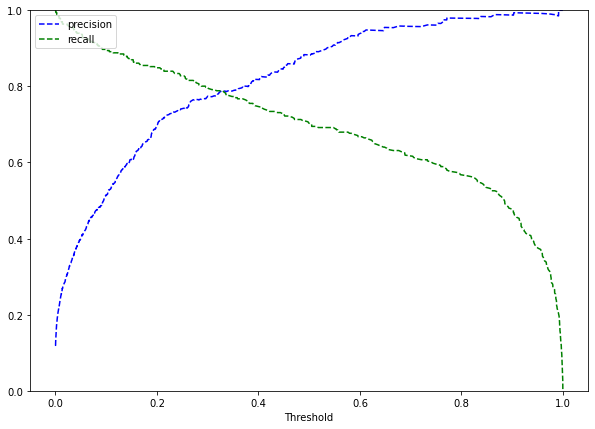

<IPython.core.display.Javascript object>

In [82]:
y_scores = lg4.predict(X_train3)
prec, rec, tre = precision_recall_curve(
    y_train,
    y_scores,
)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.33, we get balanced recall and precision.

In [83]:
# setting the threshold
optimal_threshold_curve = 0.33

<IPython.core.display.Javascript object>

#### Checking model performance on training set

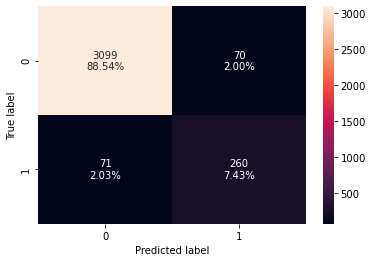

<IPython.core.display.Javascript object>

In [84]:
# creating confusion matrix
confusion_matrix_statsmodels(lg4, X_train3, y_train, threshold=optimal_threshold_curve)

In [85]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg4, X_train3, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.959714,0.785498,0.787879,0.786687


<IPython.core.display.Javascript object>

* This looks a more balanced model. 
* f1-score, Recall and Precision are almost the same.

### Model Performance Summary

In [86]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.13 Threshold",
    "Logistic Regression-0.33 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.13 Threshold,Logistic Regression-0.33 Threshold
Accuracy,0.962857,0.930000,0.959714
Recall,0.700906,0.882175,0.785498
Precision,0.882129,0.586345,0.787879
F1,0.781145,0.704463,0.786687


<IPython.core.display.Javascript object>

### Let's check the performance on the test set

**Dropping the columns from the test set that were dropped from the training set**

In [87]:
X_test3 = X_test[list(X_train3.columns)]

<IPython.core.display.Javascript object>

**Using model with default threshold**

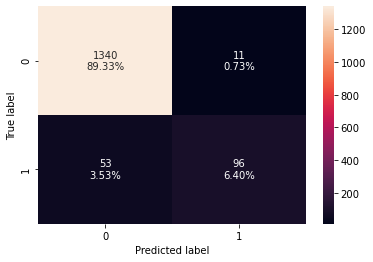

<IPython.core.display.Javascript object>

In [88]:
# creating confusion matrix
confusion_matrix_statsmodels(lg4, X_test3, y_test)

In [89]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg4, X_test3, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.957333,0.644295,0.897196,0.75


<IPython.core.display.Javascript object>

* ROC curve on test set

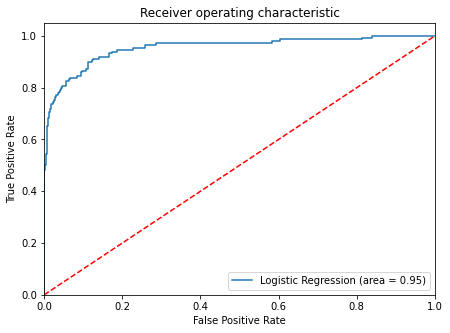

<IPython.core.display.Javascript object>

In [90]:
logit_roc_auc_train = roc_auc_score(y_test, lg4.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg4.predict(X_test3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.13** 

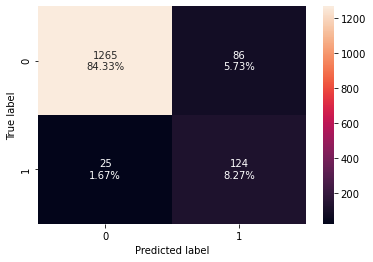

<IPython.core.display.Javascript object>

In [91]:
# creating confusion matrix
confusion_matrix_statsmodels(lg4, X_test3, y_test, threshold=optimal_threshold_auc_roc)

In [92]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = (
    model_performance_classification_statsmodels(
        lg4, X_test3, y_test, threshold=optimal_threshold_auc_roc
    )
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.926,0.832215,0.590476,0.690808


<IPython.core.display.Javascript object>

**Using model with threshold = 0.33**

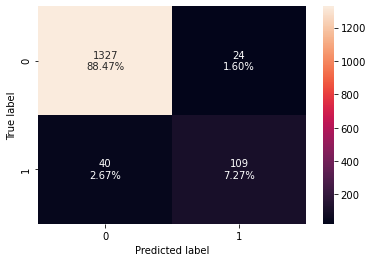

<IPython.core.display.Javascript object>

In [93]:
# creating confusion matrix
confusion_matrix_statsmodels(lg4, X_test3, y_test, threshold=optimal_threshold_curve)

In [94]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg4, X_test3, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.957333,0.731544,0.819549,0.77305


<IPython.core.display.Javascript object>

### Model performance summary

In [95]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.13 Threshold",
    "Logistic Regression-0.33 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.13 Threshold,Logistic Regression-0.33 Threshold
Accuracy,0.962857,0.930000,0.959714
Recall,0.700906,0.882175,0.785498
Precision,0.882129,0.586345,0.787879
F1,0.781145,0.704463,0.786687


<IPython.core.display.Javascript object>

In [96]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.13 Threshold",
    "Logistic Regression-0.33 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.13 Threshold,Logistic Regression-0.33 Threshold
Accuracy,0.957333,0.926000,0.957333
Recall,0.644295,0.832215,0.731544
Precision,0.897196,0.590476,0.819549
F1,0.750000,0.690808,0.773050


<IPython.core.display.Javascript object>

## Let's try using a decision tree model

# Decision Tree Model

### Data Preperation

In [97]:
X = df.drop(["Personal_Loan", "ID"], axis=1)  # Features
y = df["Personal_Loan"]  # Labels (Target Variable)
# converting target to integers - since some functions might not work with bool type

<IPython.core.display.Javascript object>

In [98]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,Age,Experience,Income,ZIPCode,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,County_Butte County,County_Contra Costa County,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Unknown,County_Ventura County,County_Yolo County
0,25,1,49,91107,1.6,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,45,19,34,90089,1.5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,39,15,11,94720,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,94112,2.7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,35,8,45,91330,1.0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Built a CART model on the train data.
4. Tune the model and prune the tree, if required.
5. Test the data on the test set.

In [99]:
feature_names = list(X)
print(feature_names)

['Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1', 'County_Butte County', 'County_Contra Costa County', 'County_El Dorado County', 'County_Fresno County', 'County_Humboldt County', 'County_Imperial County', 'County_Kern County', 'County_Lake County', 'County_Los Angeles County', 'County_Marin County', 'County_Mendocino County', 'County_Merced County', 'County_Monterey County', 'County_Napa County', 'County_Orange County', 'County_Placer County', 'County_Riverside County', 'County_Sacramento County', 'County_San Benito County', 'County_San Bernardino County', 'County_San Diego County', 'County_San Francisco County', 'County_San Joaquin County', 'County_San Luis Obispo County', 'County_San Mateo County', 'County_Santa Barbara County', 'County_Santa Clara County', 'County_Santa Cruz County', 'County_Shasta County', 'County_Siskiyou County', 'Co

<IPython.core.display.Javascript object>

## Split Data

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3500, 53) (1500, 53)


<IPython.core.display.Javascript object>

## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 9% and the frequency of class B is 91%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.09,1:0.91} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [101]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.09, 1: 0.91}, random_state=1
)

<IPython.core.display.Javascript object>

In [102]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.09, 1: 0.91}, random_state=1)

<IPython.core.display.Javascript object>

In [103]:
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

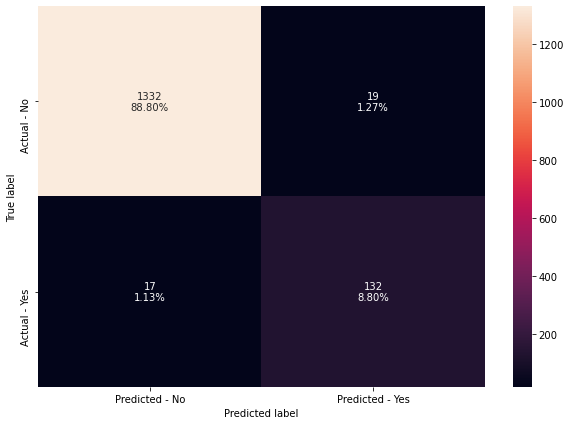

<IPython.core.display.Javascript object>

In [104]:
make_confusion_matrix(model, y_test)

In [105]:
y_train.value_counts(1)

0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64

<IPython.core.display.Javascript object>

We only have 9% of positive classes, so if our model marks each sample as negative, then also we'll get 90% accuracy, hence accuracy is not a good metric to evaluate here.

### Insights:

- **True Positives:**
    - Reality: A customer purchased a loan.
    - Model predicted: The customer will accept a personal loan.
    - Outcome: The model is good.

- **True Negatives:**
    - Reality: A customer did NOT purchase a loan.
    - Model predicted: The customer will NOT accept a personal loan.
    - Outcome: The bank is unaffected.

- **False Positives:**
    - Reality: A customer did NOT purchase a loan.
    - Model predicted: The customer will accept a personal loan.
    - Outcome: The team which is targeting the potential customers will be wasting their resources on customers who will not accept a loan.

- **False Negatives:**
    - Reality: A customer purchased a loan.
    - Model predicted: The customer will NOT accept a personal loan.
    - Outcome: The potential customer is missed by the sales/marketing team, and this will negatively affect our success ratio.

* In this case, not being able to identify a potential customer is the biggest loss we can face. Hence, recall is the right metric to check the performance of the model.

In [106]:
##  Function to calculate recall score
def get_recall_score(model):
    """
    model : classifier to predict values of X

    """
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test))

<IPython.core.display.Javascript object>

In [107]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.8859060402684564


<IPython.core.display.Javascript object>

* There is some disparity in the performance of the model on the training set and the test set, which suggests that the model is overfitting.

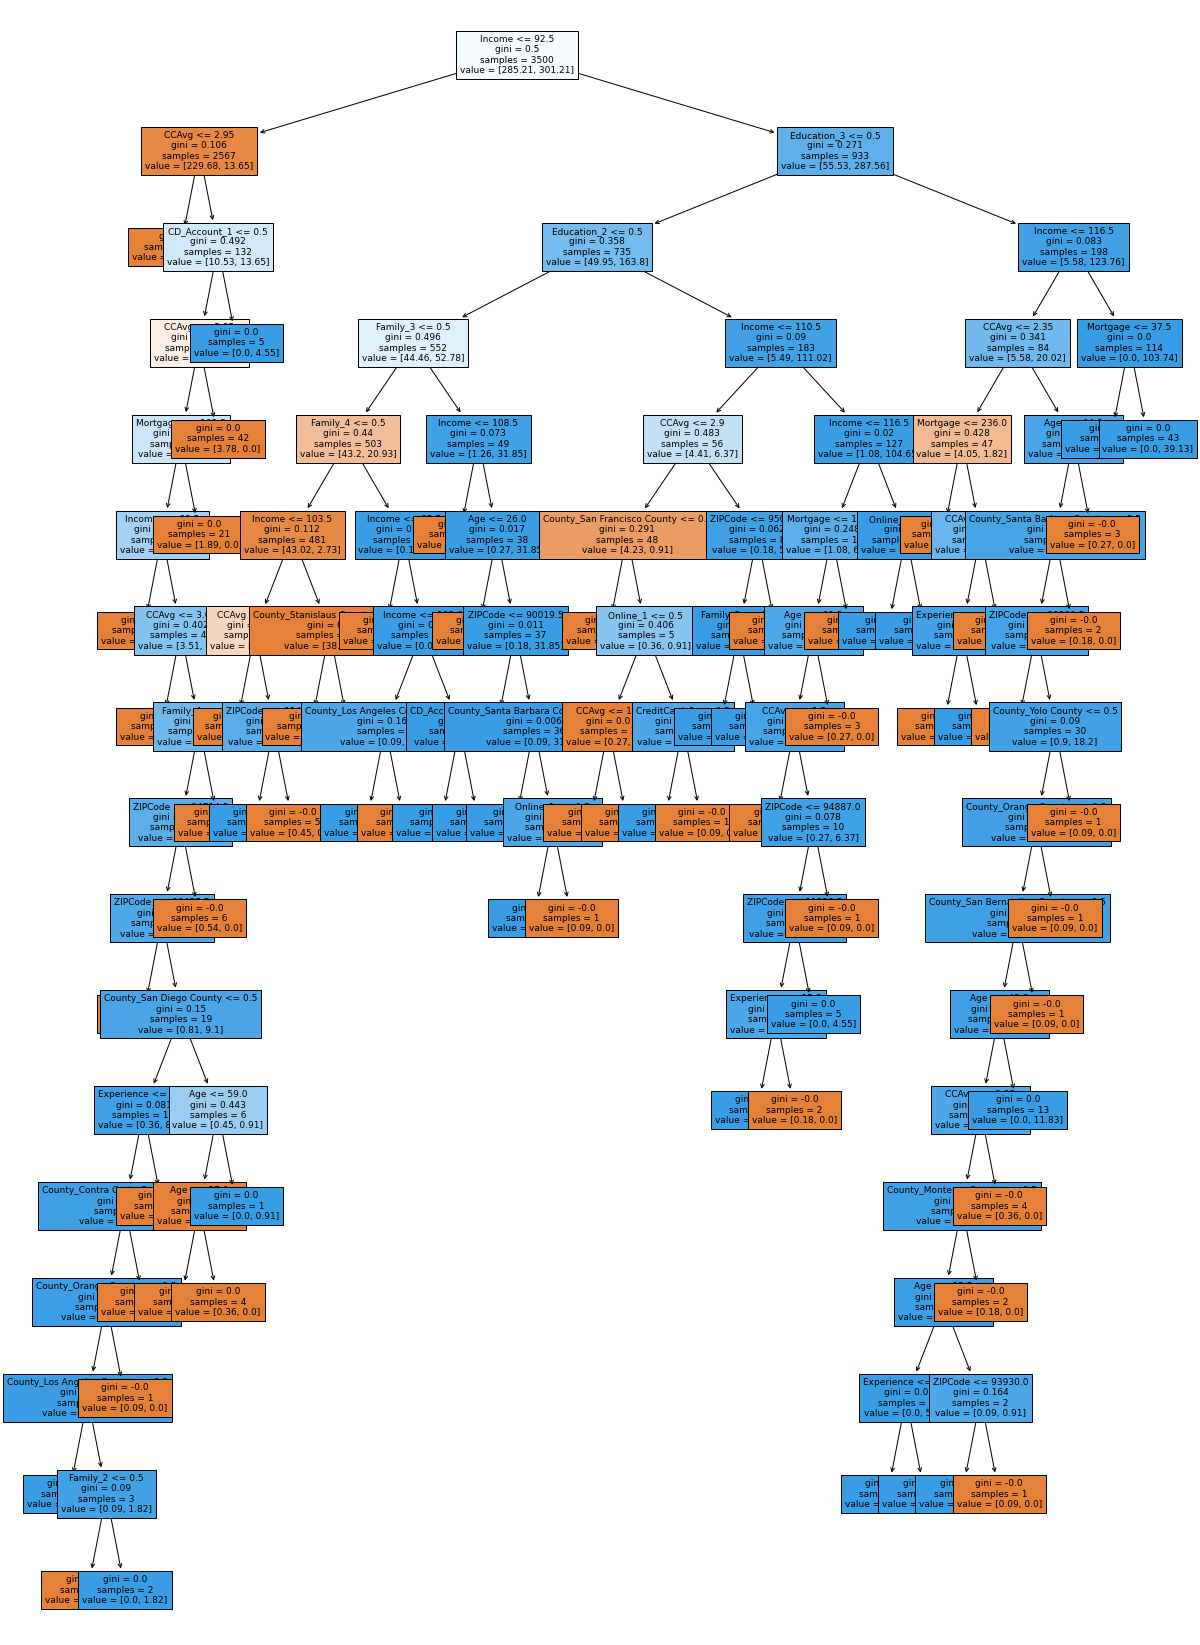

<IPython.core.display.Javascript object>

In [108]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()


In [109]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [219.15, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |--- weights: [1.35, 0.00] class: 0
|   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- weights: [0.99, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |   |   |--- ZIPCode <= 94714.50
|   |   |   |   |   |   |   |   |   |--- ZIPCode <= 90437.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.27, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- ZIPCode >  90437.50
|   |   |   |   |   |   |   |   |   |   |--- County_San Diego County <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |  

<IPython.core.display.Javascript object>

In [110]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
Income                         6.304534e-01
CCAvg                          9.474637e-02
Family_4                       8.158651e-02
Education_2                    6.084904e-02
Family_3                       6.021242e-02
Education_3                    1.997043e-02
Mortgage                       1.282500e-02
ZIPCode                        1.105999e-02
CD_Account_1                   7.255481e-03
Age                            6.087707e-03
County_San Francisco County    3.351209e-03
Experience                     2.273227e-03
Online_1                       1.760819e-03
County_Monterey County         1.162319e-03
County_Orange County           1.160398e-03
County_Santa Barbara County    1.138337e-03
County_San Diego County        6.679308e-04
Family_2                       5.854033e-04
County_Contra Costa County     5.819546e-04
County_Los Angeles County      5.813309e-04
County_San Bernardino County   5.712004e-04
County_Yolo County             5

<IPython.core.display.Javascript object>

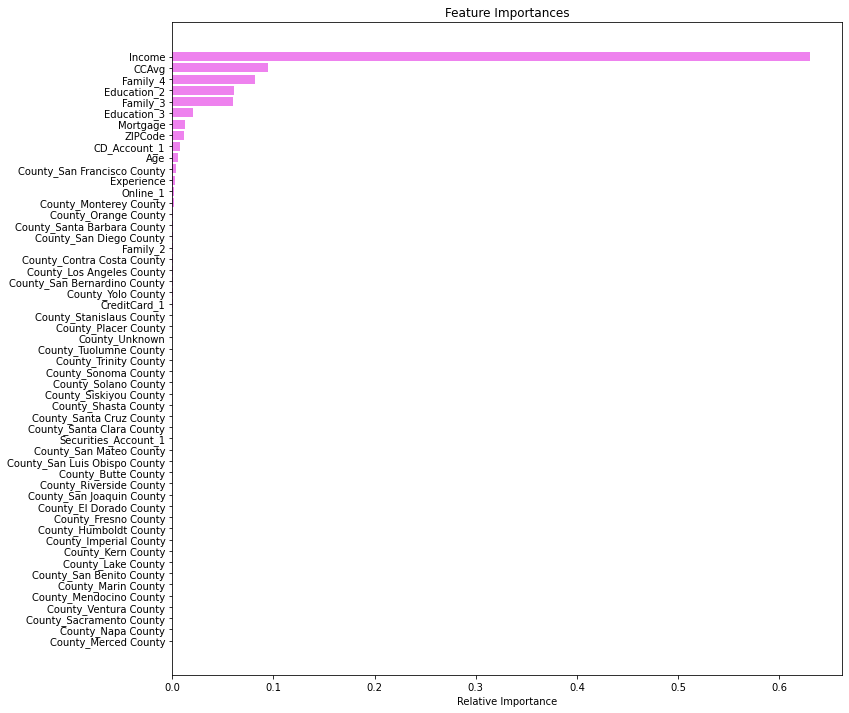

<IPython.core.display.Javascript object>

In [111]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, Income is the most important variable for predicting Personal loan purchase.

**The tree above is very complex and difficult to interpret.**

## Reducing Overfitting

### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [112]:
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

In [113]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.09, 1: 0.91})

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1, 10),
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
    "max_features": ["log2", "sqrt"],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.09, 1: 0.91}, criterion='entropy',
                       max_depth=1, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1,
                       splitter='random')

<IPython.core.display.Javascript object>

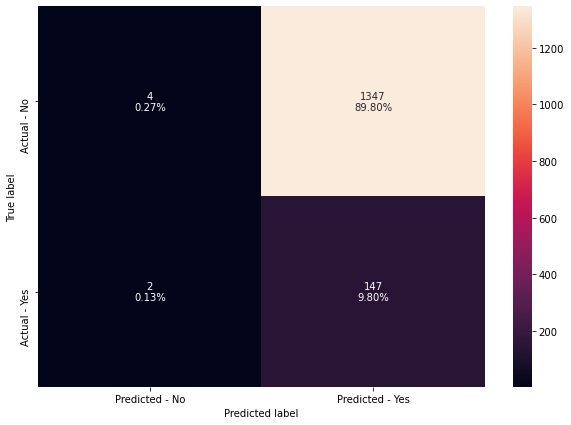

<IPython.core.display.Javascript object>

In [114]:
make_confusion_matrix(estimator, y_test)

In [115]:
get_recall_score(estimator)

Recall on training set :  1.0
Recall on test set :  0.9865771812080537


<IPython.core.display.Javascript object>

**Recall has improved for both train and test set after hyperparameter tuning, and we have got a generalized model.**

## Visualizing the Decision Tree

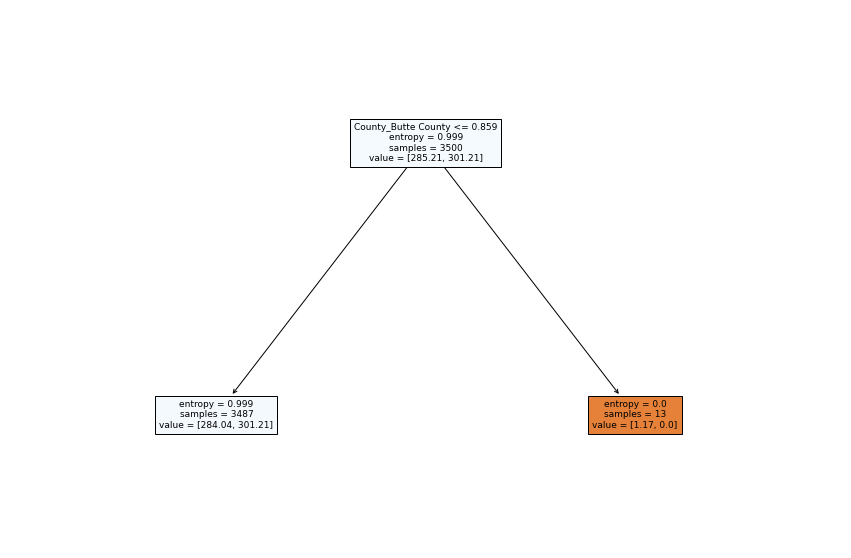

<IPython.core.display.Javascript object>

In [116]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [117]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- County_Butte County <= 0.86
|   |--- weights: [284.04, 301.21] class: 1
|--- County_Butte County >  0.86
|   |--- weights: [1.17, 0.00] class: 0



<IPython.core.display.Javascript object>

In [118]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                               Imp
County_Butte County            1.0
Age                            0.0
County_San Mateo County        0.0
County_Orange County           0.0
County_Placer County           0.0
County_Riverside County        0.0
County_Sacramento County       0.0
County_San Benito County       0.0
County_San Bernardino County   0.0
County_San Diego County        0.0
County_San Francisco County    0.0
County_San Joaquin County      0.0
County_San Luis Obispo County  0.0
County_Santa Barbara County    0.0
County_Monterey County         0.0
County_Santa Clara County      0.0
County_Santa Cruz County       0.0
County_Shasta County           0.0
County_Siskiyou County         0.0
County_Solano County           0.0
County_Sonoma County           0.0
County_Stanislaus County       0.0
County_Trinity County          0.0
County_Tuolumne County         0.0
County_Unknown                 0.0
County_Ventura County          0.0
County_Napa County             0.0
County_Merced County

<IPython.core.display.Javascript object>

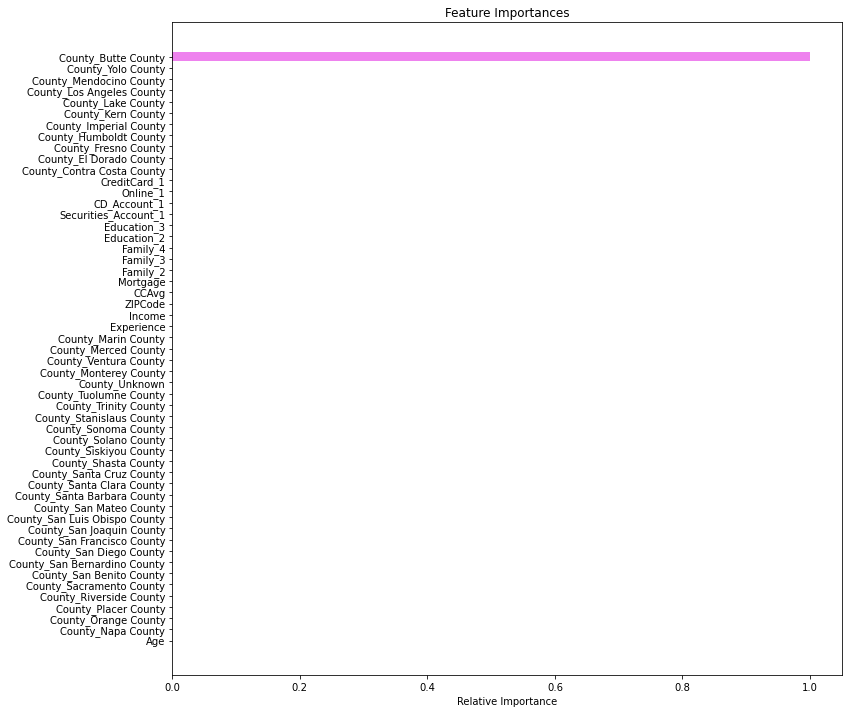

<IPython.core.display.Javascript object>

In [119]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Cost Complexity Pruning


The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfitting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of the pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` function that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [120]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.09, 1: 0.91})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [121]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-3.377129e-17
1,4.600529e-19,-3.331123e-17
2,1.192730e-18,-3.211850e-17
3,3.101097e-18,-2.901741e-17
4,3.101097e-18,-2.591631e-17
5,9.820141e-18,-1.609617e-17
6,9.303291e-17,7.693674e-17
7,3.688942e-16,4.458310e-16
8,5.695682e-16,1.015399e-15
9,1.513354e-04,3.026709e-04


<IPython.core.display.Javascript object>

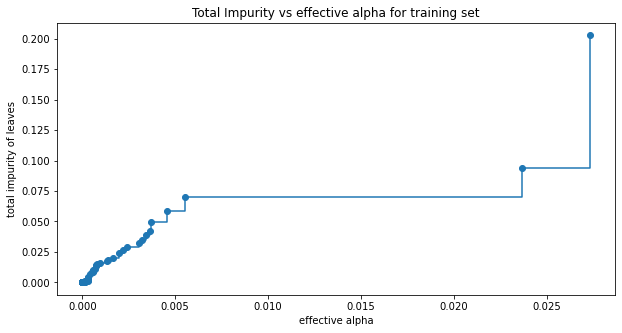

<IPython.core.display.Javascript object>

In [122]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [123]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.09, 1: 0.91}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2969518641725174


<IPython.core.display.Javascript object>


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

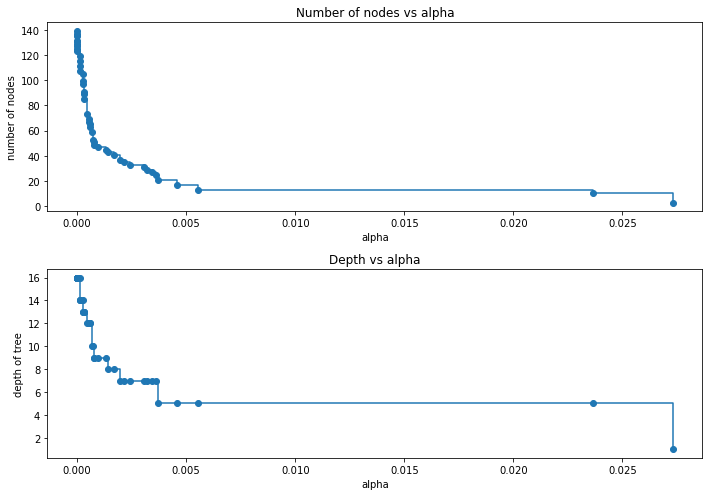

<IPython.core.display.Javascript object>

In [124]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


In [125]:
recall_train = []
for clf in clfs:
    pred_train3 = clf.predict(X_train)
    values_train = metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [126]:
recall_test = []
for clf in clfs:
    pred_test3 = clf.predict(X_test)
    values_test = metrics.recall_score(y_test, pred_test3)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [127]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

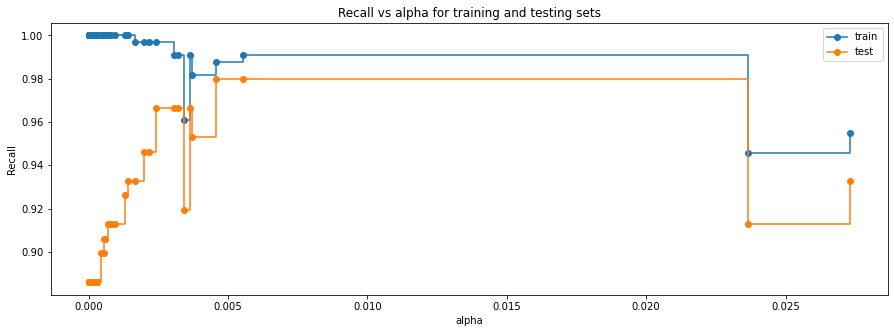

<IPython.core.display.Javascript object>

In [128]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas,
    recall_train,
    marker="o",
    label="train",
    drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Recall is at 0.004 alpha.**

In [129]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.004556813877919528,
                       class_weight={0: 0.09, 1: 0.91}, random_state=1)


<IPython.core.display.Javascript object>

In [130]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.004556813877919528,
                       class_weight={0: 0.09, 1: 0.91}, random_state=1)

<IPython.core.display.Javascript object>

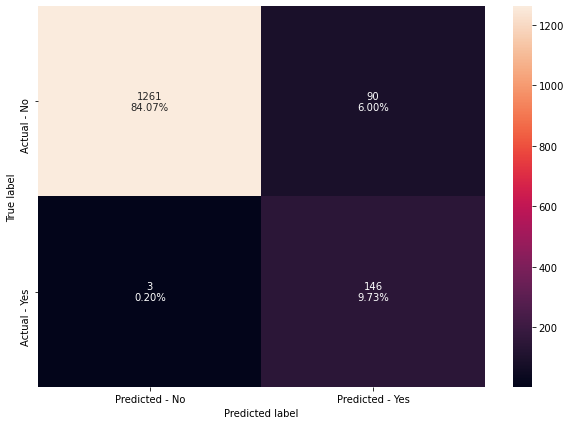

<IPython.core.display.Javascript object>

In [131]:
make_confusion_matrix(best_model, y_test)

In [132]:
get_recall_score(best_model)

Recall on training set :  0.9879154078549849
Recall on test set :  0.9798657718120806


<IPython.core.display.Javascript object>

* The results have improved from the initial model and we have got a higher recall than the hyperparameter tuned model and generalized decision tree - having comparable performance on training and test set.

## Visualizing the Decision Tree

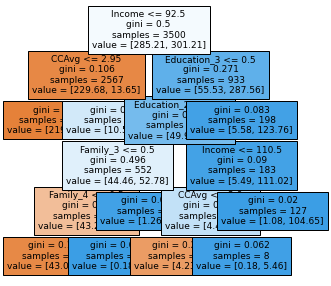

<IPython.core.display.Javascript object>

In [133]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [134]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [219.15, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [10.53, 13.65] class: 1
|--- Income >  92.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [43.02, 2.73] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.18, 18.20] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [1.26, 31.85] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- Income <= 110.50
|   |   |   |   |--- CCAvg <= 2.90
|   |   |   |   |   |--- weights: [4.23, 0.91] class: 0
|   |   |   |   |--- CCAvg >  2.90
|   |   |   |   |   |--- weights: [0.18, 5.46] class: 1
|   |   |   |--- Income >  110.50
|   |   |   |   |--- weights: [1.08, 104.65] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [5.58, 123.76] class: 1



<IPython.core.display.Javascript object>

In [135]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
Income                         0.685624
Family_4                       0.087835
Education_2                    0.068961
Family_3                       0.068240
CCAvg                          0.066707
Education_3                    0.022633
County_San Diego County        0.000000
County_San Mateo County        0.000000
County_San Luis Obispo County  0.000000
County_San Joaquin County      0.000000
County_San Francisco County    0.000000
Age                            0.000000
County_Santa Clara County      0.000000
County_San Bernardino County   0.000000
County_San Benito County       0.000000
County_Sacramento County       0.000000
County_Santa Barbara County    0.000000
County_Solano County           0.000000
County_Santa Cruz County       0.000000
County_Shasta County           0.000000
County_Siskiyou County         0.000000
County_Placer County           0.000000
County_Sonoma County           0.000000
County_Stanislaus County       0.000000


<IPython.core.display.Javascript object>

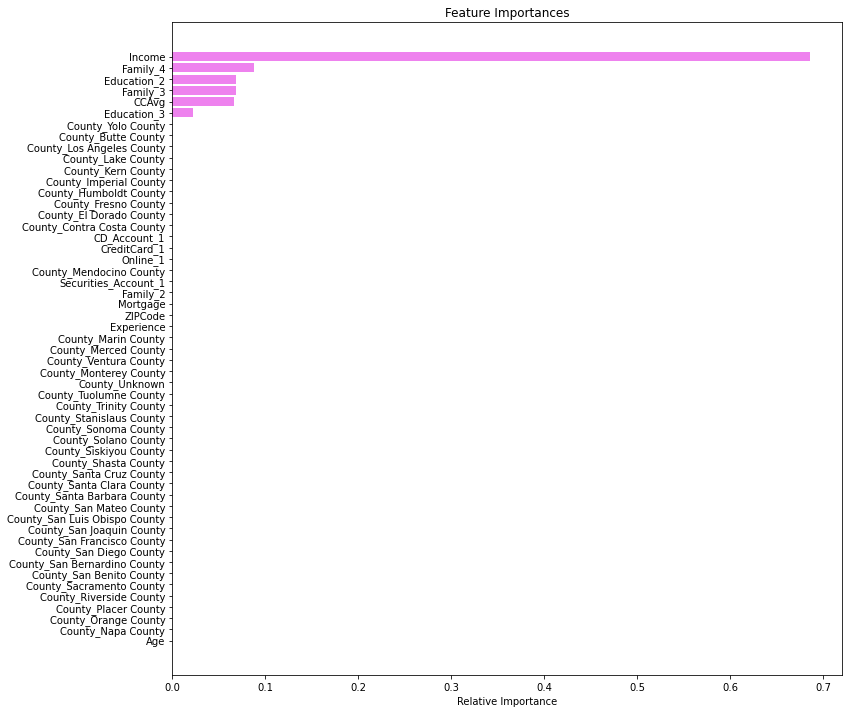

<IPython.core.display.Javascript object>

In [136]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


* Income and Family Size are the top two important features to predict customer's who will purchase a loan.

## Comparing all the decision tree models

In [137]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Initial decision tree model",
            "Decision tree with hyperparameter tuning",
            "Decision tree with post-pruning",
        ],
        "Train_Recall": [1, 1, 0.99],
        "Test_Recall": [0.88, 0.97, 0.98],
    }
)
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.00,0.88
1,Decision tree with hyperparameter tuning,1.00,0.97
2,Decision tree with post-pruning,0.99,0.98


<IPython.core.display.Javascript object>

**Decision tree model with post pruning has given the best recall score on the test data.**

### Conclusion
* We have been able to build a Logistic Regression model that can be used by the bank to predict if customers will purchase a personal loan in the new campaign with a recall score of 0.88 on the training set and 0.83 on the test set.

* Coefficient of some levels of Education, Family, Income, CCAvg and CD_Account are positive. An increase in these will lead to increase in chances of a person purchasing a loan.

* Coefficient of some levels of Securities_Account, Online and CreditCard are negative. An increase in these will lead to decrease in chances of a person purchasing a loan.

* We also used Decision Tree Classifier to build a predictive model for the same. To determine if a customer will purchase a loan or not. We ended up with a Recall score of 0.99 on the training set and 0.98 on the test set.

* We verified the fact that much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.

* Income , Family Size, Education level and Average spending on Credit cards are the most important features to predict customer's who will purchase a loan.

* Train and Test scores are comparable for both Logistic Regression and Decision Tree models. Hence we can conclude the models are good for predictions as well as inference purposes.

### Recommendations

**Decision Tree with Post-Pruning is our preferred model which follows all the assumptions, and can be used for interpretations.** 

The model is able to reduce a higher percentage of False Negatives compared to the Logistic Regression model.

**The retail marketing department should devise campaigns to target:**
- High income earning customers. Also, looking to increase the proportion of high end income depositors to maximize success rate.
- Larger families with a family size of 3 and 4. These customers are more likely to take out loans due to their family size transmitting to more financial responsibility.
- Graduates and Advanced/Professionals. These usually take up school loans and are more likely to be educated on the corporate finance system and loan services.
- Customers with high average credit card spending. These customers spending patterns predicts possible future need for a loan.